# 4.3 - Evaluación

### Silhoutte Score

$$S=\frac{b(v)-a(v)}{max(a,b)}$$

donde:

+ v:= vector de datos
+ a(v):=distancia media desde v al resto de vectores del mismo cluster
+ b(v):=distancia media desde v a los vectores del cluster más cercano



S pertenece al intervalo [-1,1], de tal manera que:

+ S=1  => buena clusterizacion
+ S=0  => overlapping
+ S=-1 => mala clusterizacion

In [1]:
from sklearn import cluster, datasets

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


import numpy as np

In [2]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)

In [3]:
X=StandardScaler().fit_transform(X)

In [4]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [5]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

**plots**

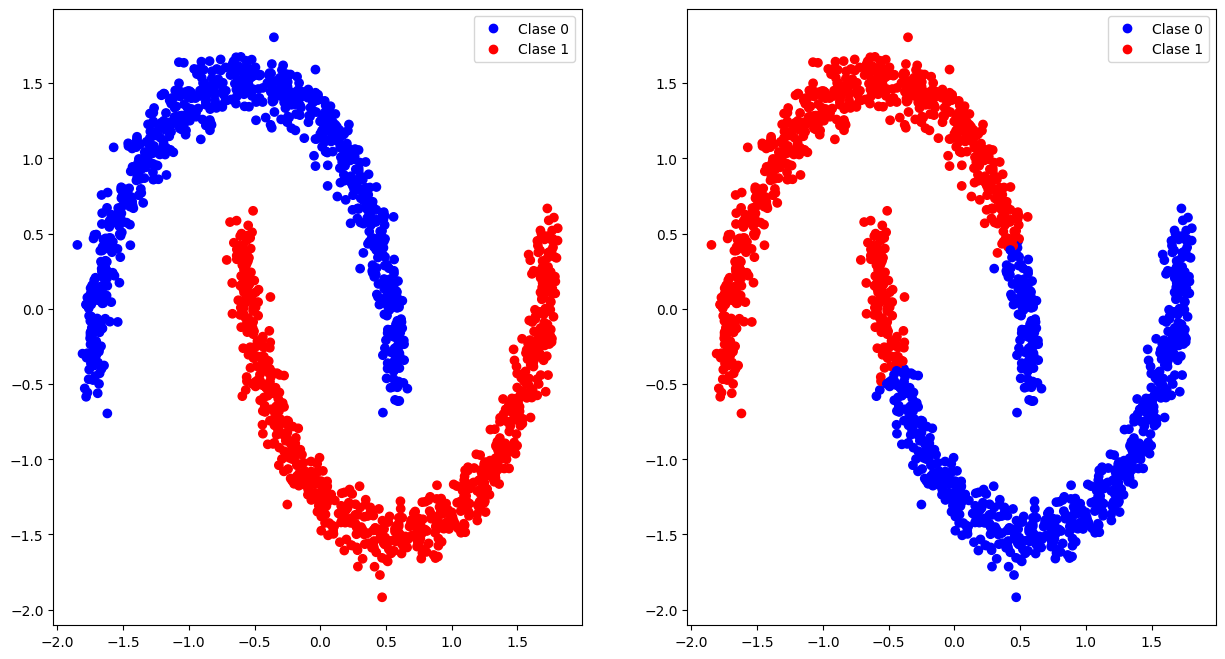

In [6]:
fig,ax = plt.subplots(1, 2, figsize=(15, 8))

colors=np.array(['blue', 'red'])

legend_e=[Line2D([0],[0], color=c, marker='o', linestyle='',
                 label='Clase {}'.format(i))  for i,c in enumerate(colors)]


ax[0].scatter(X[:,0], X[:, 1], color=colors[y1_pred])
ax[0].legend(handles=legend_e, loc='upper right')


ax[1].scatter(X[:,0], X[:, 1], color=colors[y2_pred])
ax[1].legend(handles=legend_e, loc='upper right');

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
print ('Modelo 1 - Hierarchical : Silhouette Score:{}'.format(silhouette_score(X, y1_pred)))
print ('Modelo 2 - KMeans       : Silhouette Score:{}'.format(silhouette_score(X, y2_pred)))

Modelo 1 - Hierarchical : Silhouette Score:0.3907076539867257
Modelo 2 - KMeans       : Silhouette Score:0.499208558884201


# Elbow

**nº óptimo de clusters**


![elbow](images/elbow.png)

$$WSS=Inercia=\sum_{i=0}^{n} min(|x_i - \bar{x}|^{2})$$

In [11]:
X,y=datasets.make_blobs(n_features=3, centers=2)

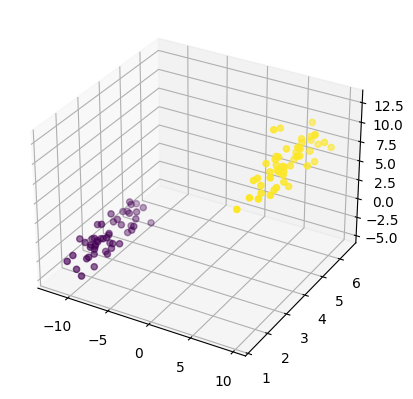

In [12]:
fig=plt.figure()

ax=fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y);

In [16]:
n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters=k).fit(X).inertia_) for k in range(1, 10)])

In [17]:
[cluster.KMeans(n_clusters=k).fit(X).inertia_ for k in range(1, 10)]

[11640.500966147712,
 301.8164361769632,
 259.8487320591545,
 226.4977599280941,
 197.48568640241342,
 175.28081065510392,
 158.93235006643326,
 143.9942962302353,
 135.48944294224566]

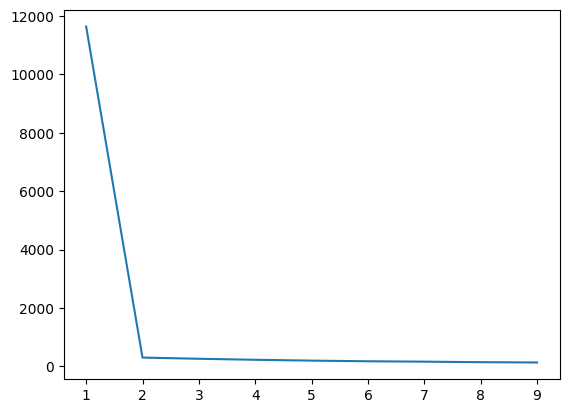

In [18]:
fig=plt.figure()

ax=fig.add_subplot()

ax.plot(n_clusters, inercia);

In [19]:
%pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
from yellowbrick.cluster import KElbowVisualizer

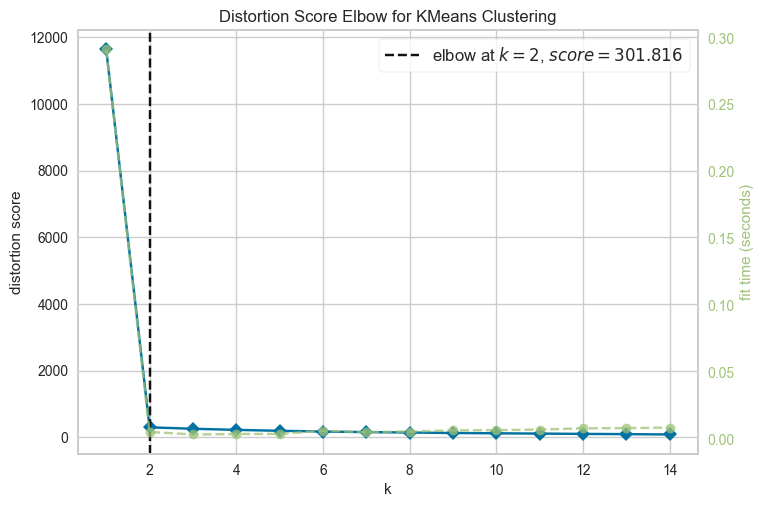

In [21]:
modelo=cluster.KMeans()

visual=KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)

visual.poof();

In [22]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [23]:
inercias=[]

for i in range(1, 10):
    
    kmeans=cluster.KMeans(n_clusters=i).fit(X)
    
    inercias.append(kmeans.inertia_)

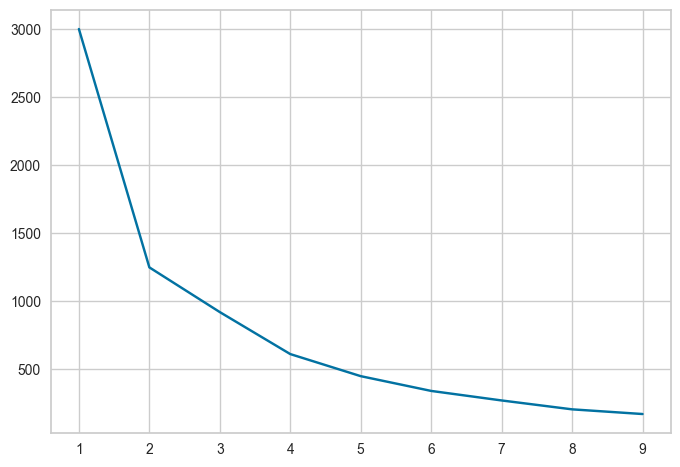

In [24]:
plt.plot(range(1, 10), inercias);

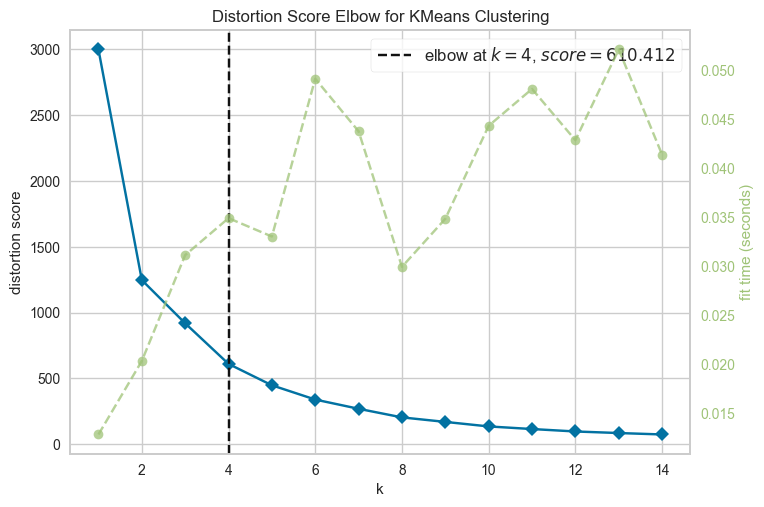

In [25]:
visual=KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)

visual.poof();

# Rand Score

$$R=\frac{(a+b)}{(a+b+c+d)}$$


pertece al intervalo [0,1]

Sea  S={ s_1, $\ldots{}$, s_n }; X={ x_1, $\ldots{}$, x_n } partición de S e Y={ y_1, $\ldots{}$, y_n } partición de S, entonces:

+ a:=nº de pares de elementos en S que están en el mismo subconjunto de X e Y
+ b:=nº de pares de elementos en S que están en diferentes subconjuntos de X e Y
+ c:=nº de pares de elementos en S que están en el mismo subconjunto de X y en diferente subconjunto de Y
+ d:=nº de pares de elementos en S que están en diferente subconjunto de X y en el mismo subconjunto de Y



Intuitivamente, _a+b_ es la correspondencia entre X e Y, c+d es la discordancia.


https://es.wikipedia.org/wiki/Partici%C3%B3n_de_un_conjunto

http://i3campus.co/CONTENIDOS/wikipedia/content/a/partici%25c3%25b3n_(matem%25c3%25a1tica).html#:~:text=En%20matem%C3%A1ticas%2C%20una%20partici%C3%B3n%20de,en%20subconjuntos%20disjuntos%20no%20vac%C3%ADos.

**Adjusted Rand Score**


$$AR=\frac{R - ExpectedR}{max(R) - ExpectedR}$$

In [26]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [27]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [28]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

In [29]:
from sklearn.metrics import adjusted_rand_score as ars

In [30]:
ars(y, y1_pred)  # hierarchical

1.0

In [31]:
ars(y, y2_pred)  # KMeans

0.4877934511570617

# Visualización de Clusters

In [32]:
X, _= datasets.make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

In [33]:
kmeans=cluster.KMeans(n_clusters=4).fit(X)

In [34]:
y_pred=kmeans.predict(X)

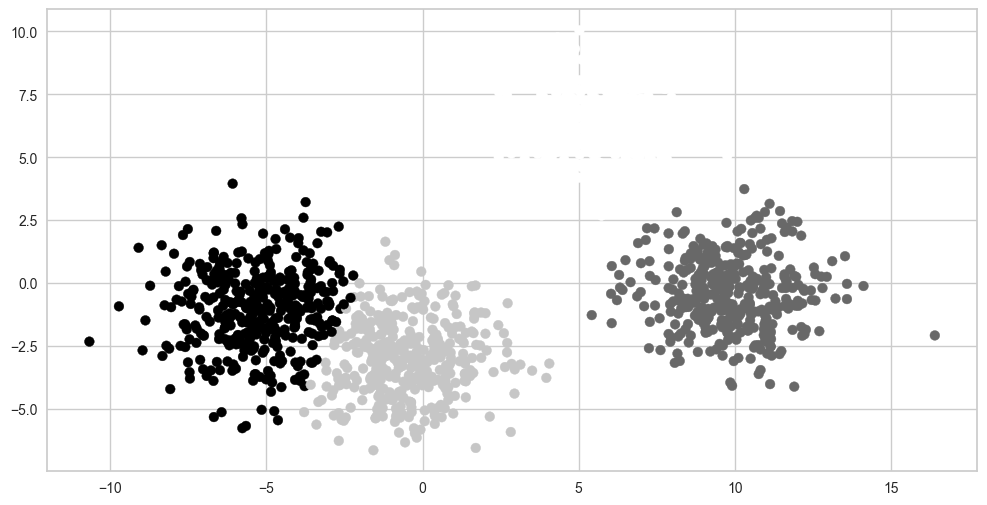

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred);

In [37]:
centers=kmeans.cluster_centers_

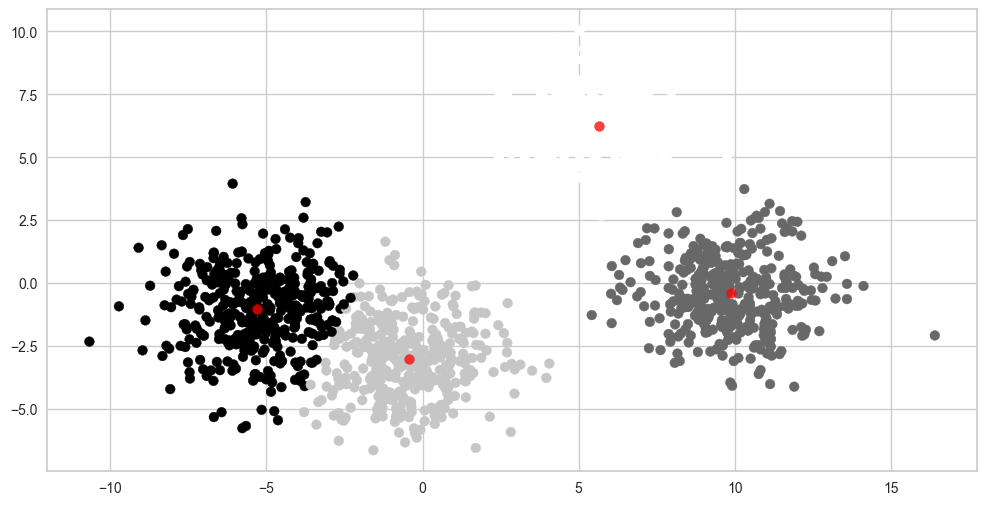

In [38]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)

plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=0.75);

**otro plot en 3D**

In [39]:
from scipy.spatial.transform import Rotation as R

In [40]:
X, _= datasets.make_blobs(n_samples=1500, centers=3, cluster_std=1.)

X=np.c_[X, 0.5*np.random.randn(X.shape[0], 1)]

rot=R.from_euler('y', 45, degrees=True)

X=rot.apply(X)

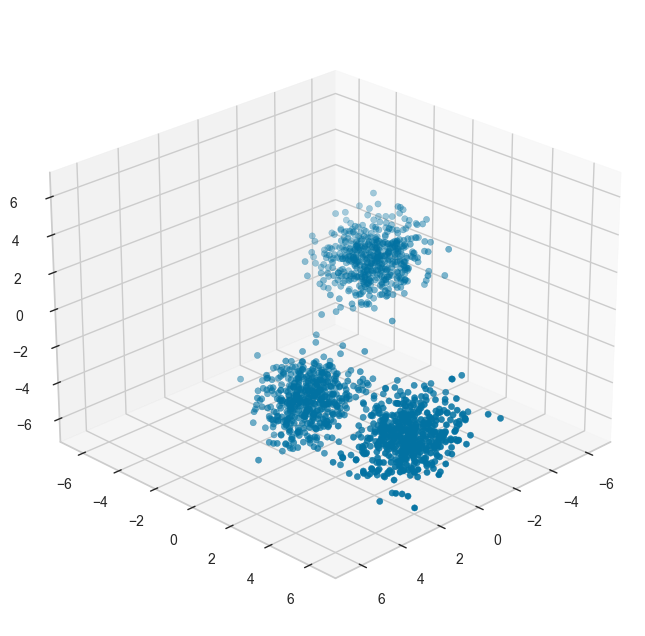

In [41]:
fig=plt.figure(figsize=(12, 8))

ax=fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.view_init(elev=25, azim=45)
plt.show();

**reduccion de dimensiones-viz**

In [42]:
from sklearn.decomposition import PCA

In [44]:
pca=PCA().fit(X)

pca_x=pca.transform(X)

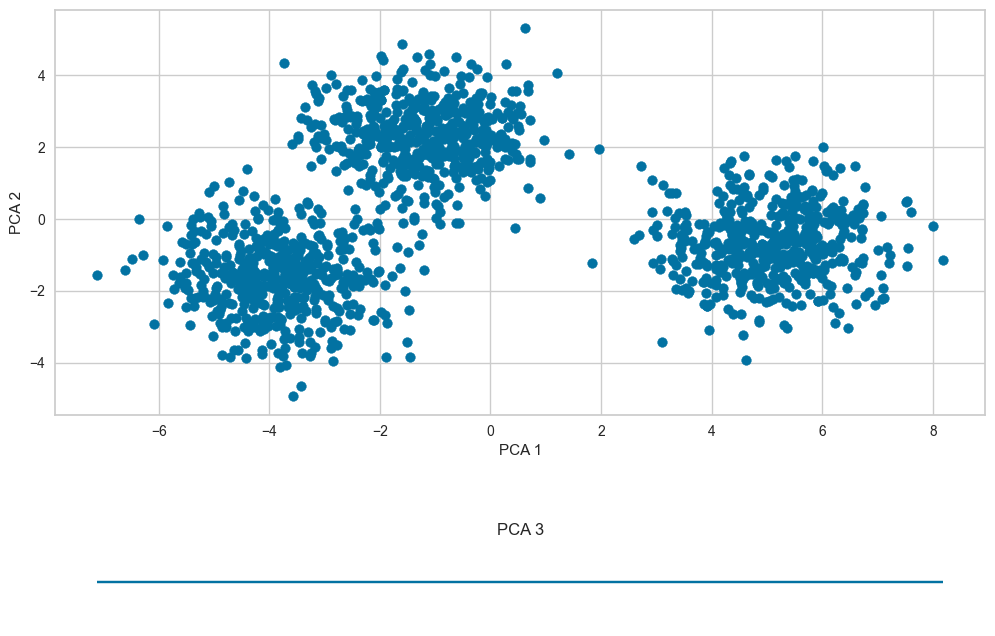

In [45]:
fig=plt.figure(figsize=(12, 8))

ax=[plt.subplot2grid((6, 1), (0, 0), rowspan=4),
    plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_x[:,0], pca_x[:,1])

ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)

y=np.ones(X.shape[0])

ax[1].plot(pca_x[:,2], y, '|', ms='20')
ax[1].axis('off')

plt.show();

**t-SNE**

In [46]:
from sklearn.manifold import TSNE

In [47]:
X,y = datasets.load_iris(return_X_y=True)

/Users/iudh/miniforge3/envs/clase/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iudh/miniforge3/envs/clase/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/iudh/miniforge3/envs/clase/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/iudh/miniforge3/envs/clase/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/iudh/miniforge3/envs/clase/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  w

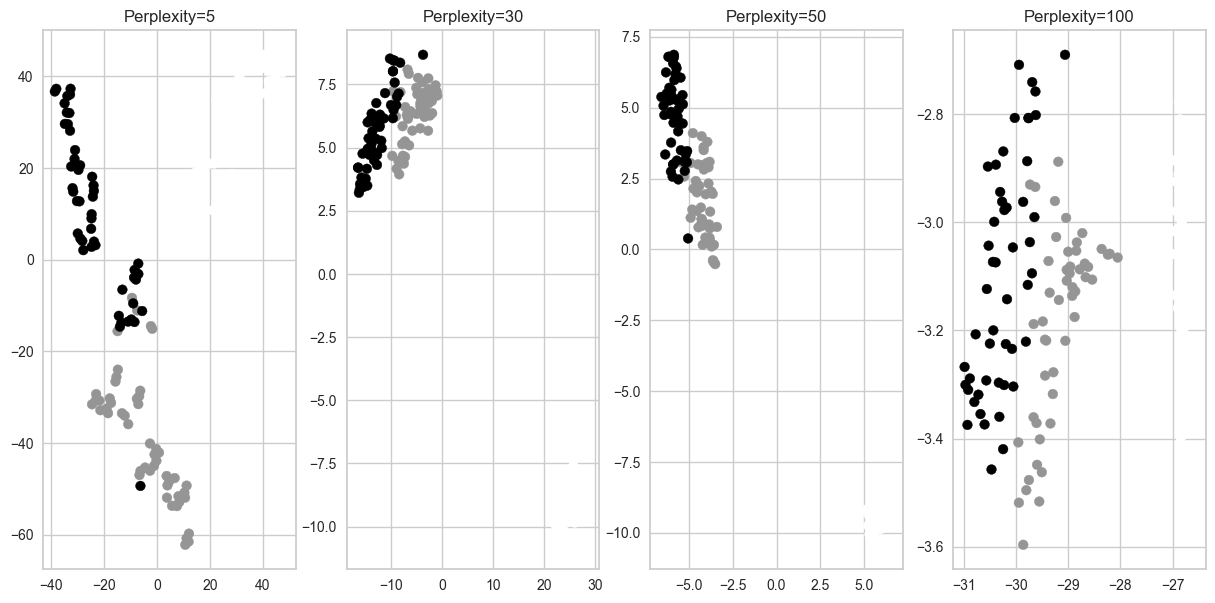

In [48]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();

**UMAP - MNIST**

In [49]:
digitos=datasets.load_digits()

digitos.data.shape

(1797, 64)

In [50]:
digitos.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [51]:
digitos.target[0]

0

In [59]:
digitos.data[0].shape

(64,)

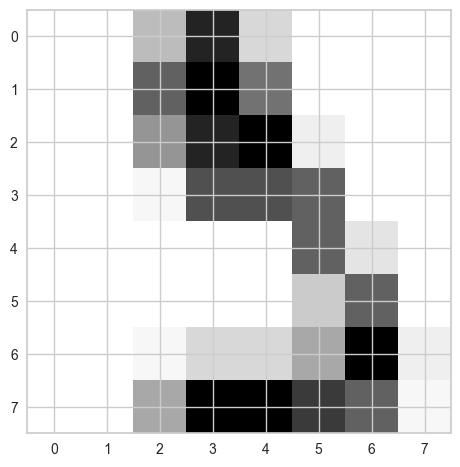

In [55]:
plt.imshow(digitos.data[19].reshape(8, 8));

In [56]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

from umap import UMAP

In [57]:
def get_umap(data, n):
    
    umap=UMAP(n_components=n)
    emb=umap.fit_transform(data)
    
    return pd.DataFrame(emb, columns=[f'emb_{i+1}' for i in range(n)])

In [60]:
umap_df=get_umap(digitos.data, 2)

umap_df.head()

,emb_1,emb_2
0,16.072126,11.902497
1,-6.403015,9.792337
2,7.604544,4.005798
3,0.398856,8.687143
4,6.096487,17.347685


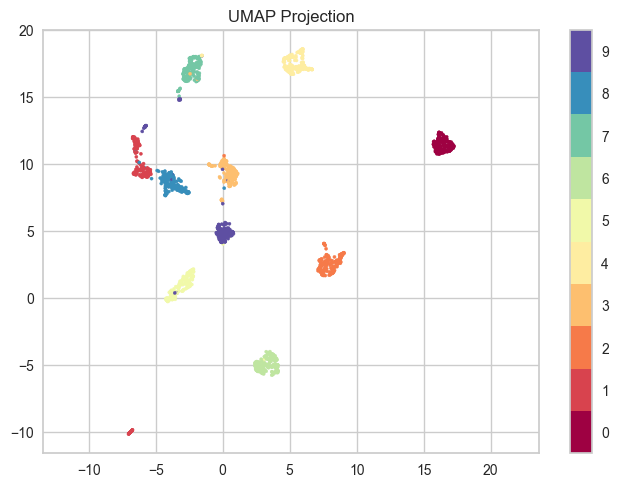

In [61]:
plt.scatter(umap_df.emb_1, 
            umap_df.emb_2, 
            c=digitos.target, 
            cmap='Spectral', 
            s=5)


plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('UMAP Projection');

**umap supervisado**

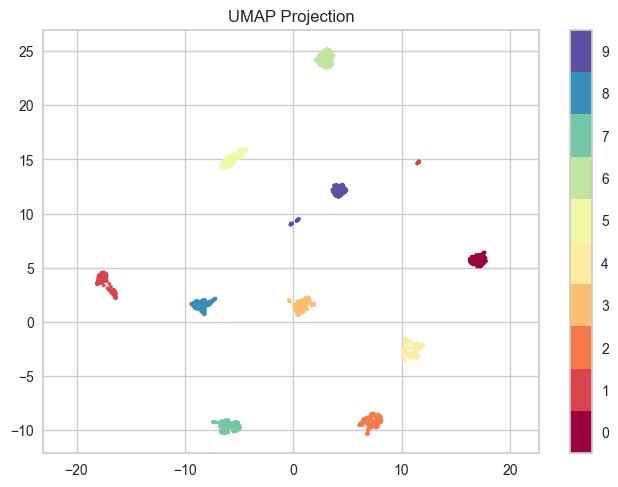

In [62]:
emb=UMAP().fit_transform(digitos.data, y=digitos.target)  # y=target es para supervisado

umap_df=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])


plt.scatter(umap_df.emb_1, umap_df.emb_2, c=digitos.target, cmap='Spectral', s=5)

plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('UMAP Projection');


**umap en moons y en blobs**

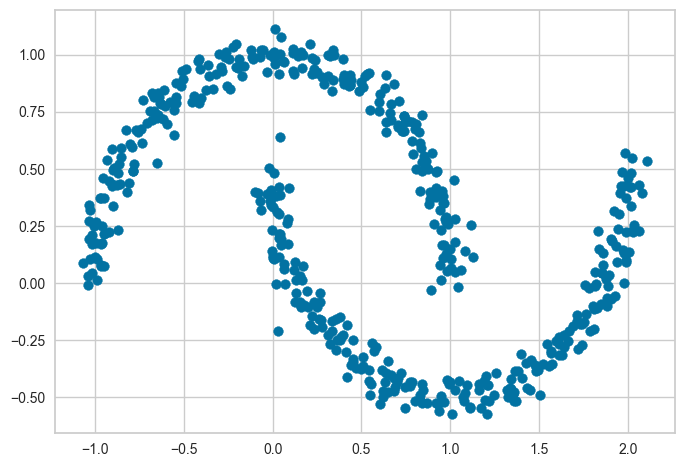

In [63]:
X,y=datasets.make_moons(n_samples=500, shuffle=True, noise=.05)

plt.scatter(X[:,0], X[:,1]);

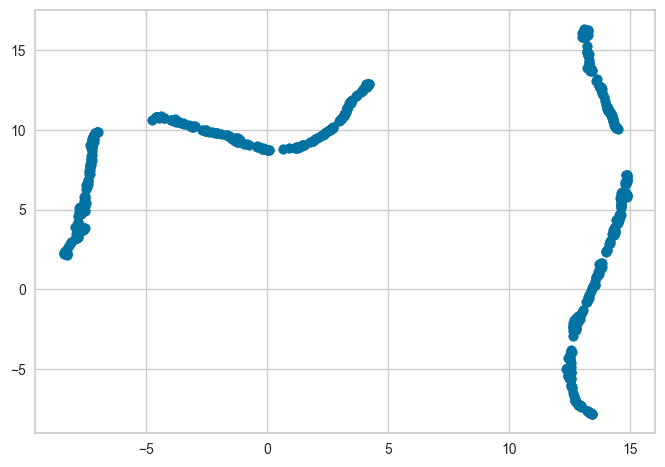

In [64]:
umap_df=get_umap(X, 2)

plt.scatter(umap_df.emb_1, umap_df.emb_2);

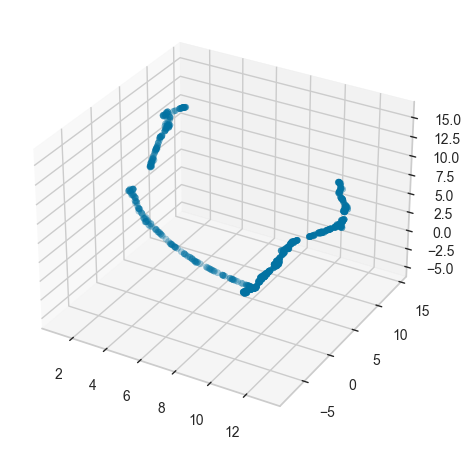

In [65]:
umap_df=get_umap(X, 3)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3);

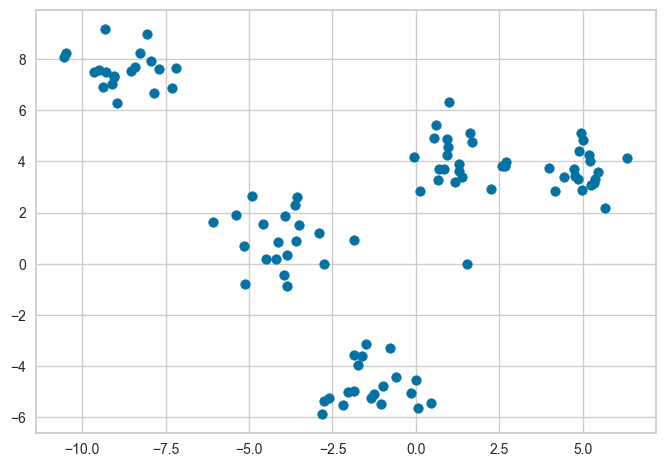

In [67]:
# blobs

X,y=datasets.make_blobs(n_features=8, centers=5)

plt.scatter(X[:,4], X[:,1]);

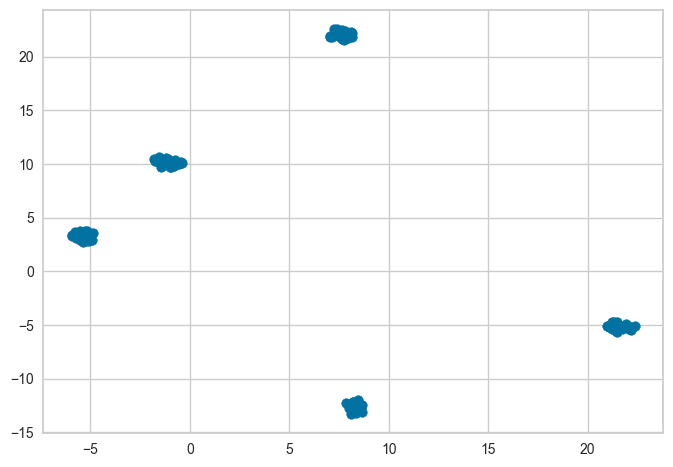

In [68]:
umap_df=get_umap(X, 2)

plt.scatter(umap_df.emb_1, umap_df.emb_2);

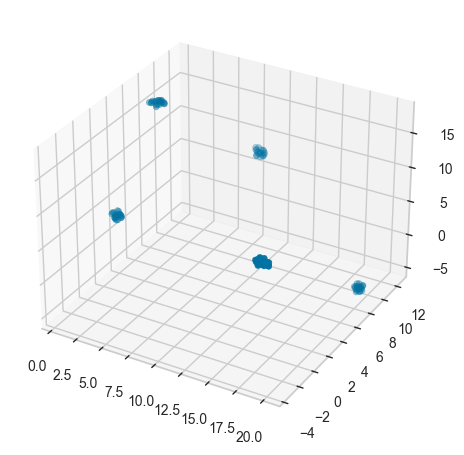

In [69]:
umap_df=get_umap(X, 3)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3);

In [71]:
from sklearn.cluster import DBSCAN

In [72]:
dbscan=DBSCAN()

pred=dbscan.fit(umap_df).labels_

In [73]:
pred

array([0, 1, 3, 2, 0, 2, 3, 1, 4, 3, 4, 0, 4, 4, 2, 2, 4, 3, 4, 3, 0, 1,
       4, 1, 1, 2, 0, 4, 4, 4, 4, 2, 4, 1, 1, 3, 3, 3, 3, 3, 0, 1, 1, 3,
       2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 4, 1, 3, 2, 2, 1, 1, 1, 2, 0, 3,
       4, 3, 2, 4, 3, 3, 0, 2, 1, 0, 3, 1, 1, 2, 3, 4, 0, 1, 2, 2, 3, 0,
       2, 0, 4, 0, 0, 4, 0, 3, 0, 4, 1, 4])

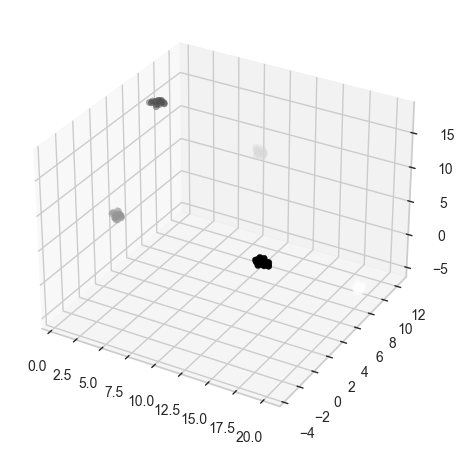

In [74]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3, c=pred);

In [75]:
ars(y, pred)

1.0